# Exploratory Data Analysis
## Reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'Book1.csv'

# reading data
given_data = pd.read_csv(filename, sep = ';')

# sorting on suppliers
harpy_data = given_data.loc[given_data['supplier'] == 'harpy.co']
westeros_data = given_data.loc[given_data['supplier'] != 'harpy.co']


## Full production

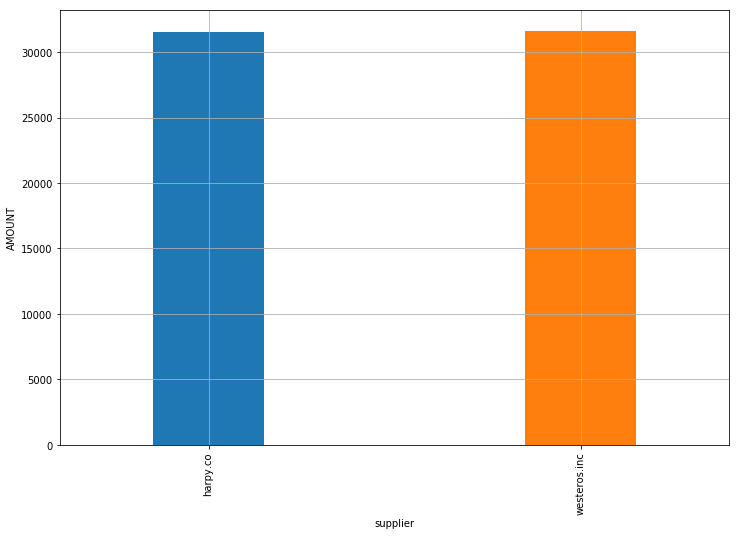

In [3]:

# histograms
plt.subplots(figsize = (12, 8))
plt.ylabel('AMOUNT')
full_prod = given_data.groupby(['supplier'])['produced'].sum()
full_prod.plot.bar(width = 0.3, grid = True)
plt.show()


## Full defects

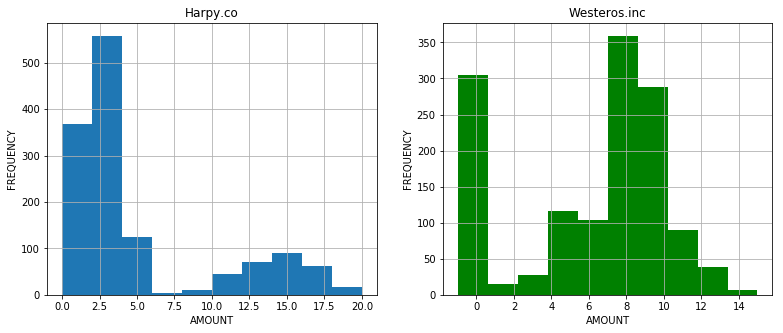

In [4]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (13,5))

# harpy histogram
ax1.set_title('Harpy.co')
ax1.set_xlabel('AMOUNT')
ax1.set_ylabel('FREQUENCY')
harpy_data['defects'].hist(ax = ax1)

# westeros histogram
ax2.set_title('Westeros.inc')
ax2.set_xlabel('AMOUNT')
ax2.set_ylabel('FREQUENCY')
westeros_data['defects'].hist(ax = ax2, color = 'green')


## Getting ids of smiths

In [7]:

harpy_smith_id = pd.unique(harpy_data['unsullen.id'])
westeros_smith_id = pd.unique(westeros_data['unsullen.id'])


## Count Average Defect Statistics

In [8]:
def average_defect_statistics(data, ids):
    info_defects_temp = pd.Series()
    defects_for_month = []
    
    for i in range(0, len(ids)):
        cur_uns = data.loc[data['unsullen.id'] == ids[i]]  
        produced = cur_uns['produced'][cur_uns['produced'] != 0]      
        average = []
        
        for j in range(0, 6):
            defects_for_month.append(0)
            defects_for_month[j] = cur_uns.loc[cur_uns['production.date'] == cur_uns['report.date']-j-1]['defects']  
            defects_list = defects_for_month[j].tolist()
            produced_list = produced[0:6-j].tolist()
            average.append(0)
            average[j] = sum(np.multiply(defects_list, produced_list)) / sum(produced[0:6-j])  
    
        average_ds = pd.Series(average)
        info_defects_temp = pd.concat([info_defects_temp, average_ds])
    
    info_defects = pd.DataFrame(data = info_defects_temp.values.reshape(len(ids), 6), columns = range(1, 7)) 
    return info_defects

# harpy.co
harpy_info_defects = average_defect_statistics(harpy_data, harpy_smith_id)

# westeros.inc
westeros_info_defects = average_defect_statistics(westeros_data, westeros_smith_id)


## Boxplots 

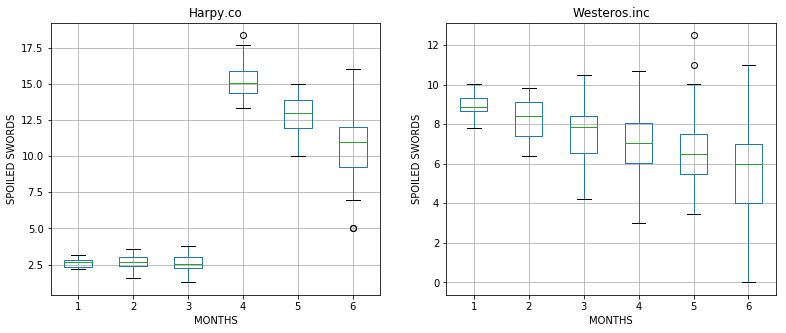

In [20]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (13,5)) 

# boxplot_harpy
ax1.set_title('Harpy.co')
ax1.set_xlabel('MONTHS')
ax1.set_ylabel('SPOILED SWORDS')
harpy_info_defects.boxplot(ax = ax1)

# boxplot_westeros
ax2.set_title('Westeros.inc')
ax2.set_xlabel('MONTHS')
ax2.set_ylabel('SPOILED SWORDS')
westeros_info_defects.boxplot(ax = ax2)


## Averages graph for the obtained distributions 

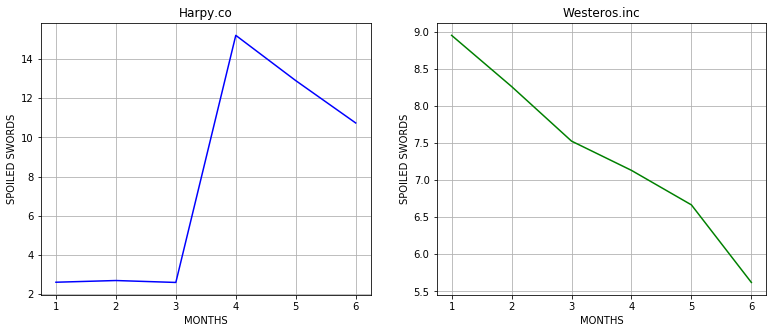

In [9]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5))

# harpy.co
ax1.set_xlabel('MONTHS')
ax1.set_ylabel('SPOILED SWORDS')
harpy_info_defects.mean().plot(ax = ax1, title = 'Harpy.co', grid = True, color = 'blue') 

# westeros.inc
ax2.set_xlabel('MONTHS')
ax2.set_ylabel('SPOILED SWORDS')
westeros_info_defects.mean().plot(ax = ax2, title = 'Westeros.inc', grid = True, color = 'green') 
